<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_05/textmining_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **웹크롤링 자료를 분석하는 방법**
## **1. 간단한 예제**

In [1]:
# 텍스트 입력(웹크롤링 자료로 가정)
text = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [2]:
# prompt: text를 1개의 string으로 바꾸어줘

# 텍스트 리스트를 하나의 문자열로 결합
combined_text = ' '.join(text)
combined_text

'This is the first document. This document is the second document. And this is the third one. Is this the first document?'

In [5]:
import re

# 1. 영어 단어만 추출 (하이픈 무시)

words = re.findall(r'\b[a-zA-Z]+\b', combined_text)
words

['This',
 'is',
 'the',
 'first',
 'document',
 'This',
 'document',
 'is',
 'the',
 'second',
 'document',
 'And',
 'this',
 'is',
 'the',
 'third',
 'one',
 'Is',
 'this',
 'the',
 'first',
 'document']

In [19]:
# 2. 소문자로 변환
words = [word.lower() for word in words]
'/ '.join(words)

'this/ is/ the/ first/ document/ this/ document/ is/ the/ second/ document/ and/ this/ is/ the/ third/ one/ is/ this/ the/ first/ document'

In [22]:
import nltk
# nltk 불용어 다운로드 (최초 1회만)
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [24]:
# 3. 불용어 제거
filtered_words = [word for word in words if word not in stop_words]
filtered_words

['first',
 'document',
 'document',
 'second',
 'document',
 'third',
 'one',
 'first',
 'document']

In [25]:

# 4. 단어들을 하나의 문자열로 합치기
filtered_text = ' '.join(filtered_words)
filtered_text

'first document document second document third one first document'

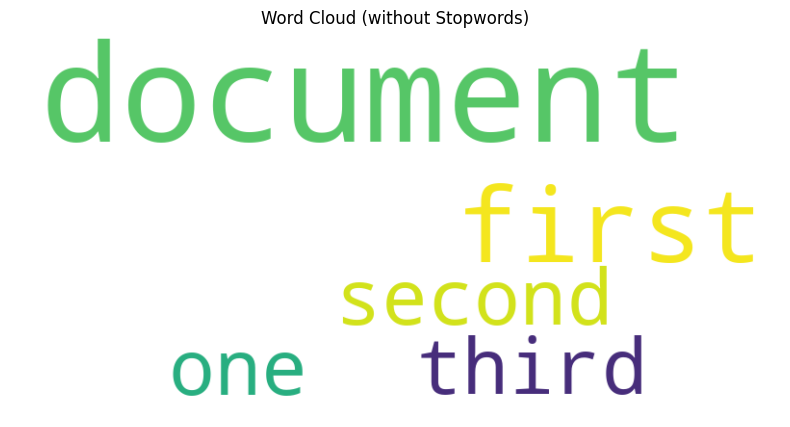

In [28]:
# 5. 워드클라우드 생성 (하나의 텍스트로 함수에 입력)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)


# 6. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (without Stopwords)")
plt.show()

## **2. 웹크롤잉 예제**

In [29]:
# prompt: https://quotes.toscrape.com/ 에서 Top Ten tags의 각 tag에 해당되는 url에서 1부터 10페이지까지 순회하면서 인용문과 저자정보를 추출하여 모두 저장하고 데이터프레임으로 변경하는 코드

import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_quotes(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    quotes = []
    for quote in soup.find_all('div', class_='quote'):
        text = quote.find('span', class_='text').text
        author = quote.find('small', class_='author').text
        quotes.append({'text': text, 'author': author})
    return quotes

def scrape_tag_pages(tag_url):
    all_quotes = []
    for page_num in range(1, 11):  # Iterate through pages 1 to 10
        page_url = f"{tag_url}/page/{page_num}/"
        try:
          quotes = scrape_quotes(page_url)
          if not quotes:  # Check if the page is empty; break if no quotes are found
              break
          all_quotes.extend(quotes)
        except requests.exceptions.RequestException as e:
            print(f"Error scraping {page_url}: {e}")
            break  # Stop if there's an error on a page
    return all_quotes

base_url = 'https://quotes.toscrape.com'
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')

top_ten_tags = []
for tag in soup.find_all('a', class_='tag'):
  top_ten_tags.append(tag.text)

all_data = []
for tag in top_ten_tags:
  tag_url = f"{base_url}/tag/{tag}"
  quotes = scrape_tag_pages(tag_url)
  for quote in quotes:
    quote['tag'] = tag # add the tag as a column
    all_data.append(quote)
df = pd.DataFrame(all_data)
df


,text,author,tag
0,“The world as we have created it is a process ...,Albert Einstein,change
1,“The world as we have created it is a process ...,Albert Einstein,deep-thoughts
2,“The world as we have created it is a process ...,Albert Einstein,thinking
3,"“The trouble with having an open mind, of cour...",Terry Pratchett,thinking
4,“The world as we have created it is a process ...,Albert Einstein,world
...,...,...,...
221,"“The truth."" Dumbledore sighed. ""It is a beaut...",J.K. Rowling,truth
222,“Never tell the truth to people who are not wo...,Mark Twain,truth
223,"“A day without sunshine is like, you know, nig...",Steve Martin,simile
224,“Life is like riding a bicycle. To keep your b...,Albert Einstein,simile


### 실습과제 text에서 단어의 출현빈도를 구하고 워드클라우드로 시각화하라



In [ ]:
BASE_URL = "https://books.toscrape.com/"
CATEGORY_NAMES = [
    'Travel', 'Mystery', 'Historical Fiction', 'Sequential Art', 'Classics',
    'Philosophy', 'Romance', 'Womens Fiction', 'Fiction', 'Childrens', 'Religion'
]